# Employee Attrition - Decision Tree use case(Algorithm Scratch Implementation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import io

Data whis is splited format

In [3]:
X_train = pd.read_csv("C:\\Users\\vinnu\\Downloads\\X_train.csv")
X_test =pd.read_csv("C:\\Users\\vinnu\\Downloads\\X_test.csv")
y_train = pd.read_csv("C:\\Users\\vinnu\\Downloads\\y_train.csv")
y_test = pd.read_csv("C:\\Users\\vinnu\\Downloads\\y_test.csv")

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1102, 36) (1102, 1)
(368, 36) (368, 1)


In [5]:
1102+368

1470

In [6]:
y_test.value_counts()

Target
0         309
1          59
dtype: int64

In [7]:
y_train.value_counts()

Target
0         924
1         178
dtype: int64

We can see that there is imbalance in the data 

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from collections import Counter

In [10]:
smt= SMOTE()

In [11]:
X_sm, y_sm = smt.fit_resample(X_train,y_train) 

In [12]:
print(X_train.shape,y_train.shape)

(1102, 36) (1102, 1)


In [13]:
y_train.value_counts()

Target
0         924
1         178
dtype: int64

In [14]:
print(X_sm.shape,y_sm.shape)

(1848, 36) (1848, 1)


In [15]:
y_sm.value_counts()

Target
0         924
1         924
dtype: int64

In [16]:
Counter(y_sm)

Counter({'Target': 1})

In [17]:
y_sm.value_counts()

Target
0         924
1         924
dtype: int64

In [18]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,25,1124,8,1,0.127479,2,0,83,3,1,...,0,0.000000,0.000000,1.000000,0.0,0.513412,0.486588,0.0,0.513412,0.486588
1844,38,407,22,3,0.144372,3,0,88,3,1,...,2,0.000000,0.158786,0.841214,0.0,0.841214,0.158786,0.0,0.158786,0.841214
1845,55,490,3,3,0.151584,3,1,43,2,4,...,8,0.000000,0.253100,0.746900,0.0,0.746900,0.253100,0.0,0.253100,0.746900
1846,20,479,9,2,0.127479,1,0,89,2,1,...,0,0.886428,0.113572,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000


In [19]:
y_sm

,Target
0,0
1,0
2,0
3,0
4,0
...,...
1843,1
1844,1
1845,1
1846,1


Entropy

In [20]:
def entropy(y):
    p=y.value_counts(normalize=True).values
    ent = -np.sum(p*np.log2(p+1e-9)) # adding small term to avoid log0
    return ent

Weighted Entropy

In [21]:
def calculate_weighted_entropy(feature,y):
    categories = feature.unique()

    weighted_entropy = 0

    for category in categories:
        y_category = y[feature == category]
        entropy_category = entropy(y_category)
        weighted_entropy += y_category.shape[0]/y.shape[0]*entropy_category


    return weighted_entropy

Information Gain

In [22]:
def information_gain(feature,y):
    parent_entropy = entropy(y)

    child_entropy = calculate_weighted_entropy(feature,y)

    ig = parent_entropy - child_entropy

    return ig

In [23]:
sample_data = pd.read_csv('sample_data.csv')
sample_data

,Gender,Age_less_35,JobRole,Attrition
0,Male,True,Laboratory Technician,0
1,Male,False,Sales Executive,1
2,Male,True,Sales Representative,1
3,Female,False,Healthcare Representative,0
4,Male,True,Sales Executive,0
...,...,...,...,...
995,Male,False,Laboratory Technician,1
996,Female,False,Manufacturing Director,0
997,Female,True,Sales Executive,0
998,Male,False,Manager,0


In [24]:
sample_data['Attrition'].value_counts()

0    831
1    169
Name: Attrition, dtype: int64

In [25]:
#Entropy at root node

In [26]:
entropy(sample_data.Attrition)

0.6554120789588516

In [27]:
#weighted entropy of child for gender

In [28]:
calculate_weighted_entropy(sample_data.Gender,sample_data.Attrition)

0.6554087812684072

In [29]:
#Information gain

In [30]:
information_gain(sample_data.Gender, sample_data.Attrition)

3.2976904443815513e-06

In [32]:
for i in sample_data.columns:
    print(f'Information gain for {i} is {information_gain(sample_data[i], sample_data.Attrition)}')

Information gain for Gender is 3.2976904443815513e-06
Information gain for Age_less_35 is 0.021463064919737374
Information gain for JobRole is 0.05429906805101925
Information gain for Attrition is 0.6554120804015467


# Gini Impurity

In [33]:
def gini_impurity(y):
    p=y.value_counts(normalize=True).values
    gini = 1-np.sum(p**2)
    
    return gini

In [34]:
gini_impurity(sample_data.Attrition)

0.28087799999999996

In [35]:
def calculate_weighted_entropy_gini(feature,y):
    categories = feature.unique()

    weighted_gini_entropy = 0

    for category in categories:
        y_category = y[feature == category]
        gini_entropy_category = gini_impurity(y_category)
        weighted_gini_entropy += y_category.shape[0]/y.shape[0]*gini_entropy_category


    return weighted_gini_entropy

In [36]:
calculate_weighted_entropy_gini(sample_data.Age_less_35,sample_data.Attrition)

0.2724771918985819

In [37]:
def information_gain(feature,y):
    parent_gini = gini_impurity(y)
    
    child_gini = calculate_weighted_entropy_gini(feature,y)
    
    ig= parent_gini- child_gini
    
    return ig

In [38]:
information_gain(sample_data.Age_less_35, sample_data.Attrition)

0.008400808101418078

In [39]:
for feature in sample_data.columns[:-1]:
    print(f'Information Gain for feature {feature} is {information_gain(sample_data[feature],sample_data.Attrition)}')

Information Gain for feature Gender is 1.2832567979348397e-06
Information Gain for feature Age_less_35 is 0.008400808101418078
Information Gain for feature JobRole is 0.020654039636781696


# Decision Tree - sklearn

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(random_state=42)

In [42]:
tree.fit(X_sm,y_sm)

DecisionTreeClassifier(random_state=42)

In [43]:
tree.score(X_test,y_test)

0.7635869565217391

In [45]:
from sklearn.model_selection import KFold, cross_validate
kfold = KFold(n_splits=10)
cv_acc_result =cross_validate(tree,X_sm,y_sm,cv=kfold, scoring ='accuracy',return_train_score=True)

In [46]:
cv_acc_result

{'fit_time': array([0.05121469, 0.10053205, 0.09199643, 0.09510756, 0.09288239,
        0.08990741, 0.09897208, 0.09300876, 0.08849525, 0.08109093]),
 'score_time': array([0.01108718, 0.01136637, 0.01131916, 0.01101041, 0.01000452,
        0.01100826, 0.01099348, 0.0110023 , 0.01099563, 0.01147509]),
 'test_score': array([0.77837838, 0.74594595, 0.71351351, 0.70810811, 0.83243243,
        0.81621622, 0.92972973, 0.91891892, 0.95108696, 0.91304348]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [47]:
'''cv_acc_result = {
    'fit_time': [...],         # how long training took for each fold
    'score_time': [...],       # how long scoring (predicting) took
    'test_score': [...],       # accuracy on the test fold (for each of the 10)
    'train_score': [...]       # accuracy on the training folds (for each of the 10)
}
'''

"cv_acc_result = {\n    'fit_time': [...],         # how long training took for each fold\n    'score_time': [...],       # how long scoring (predicting) took\n    'test_score': [...],       # accuracy on the test fold (for each of the 10)\n    'train_score': [...]       # accuracy on the training folds (for each of the 10)\n}\n"

In [48]:
cv_acc_result['train_score'].mean()

1.0

In [49]:
cv_acc_result['test_score'].mean()

0.8307373678025852

In [50]:
cv_acc_result['train_score'].std()*100

0.0

In [51]:
cv_acc_result['test_score'].std()*100

8.81804663346297

In [52]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.875, 'x[35] <= 0.0\ngini = 0.5\nsamples = 1848\nvalue = [924, 924]'),
 Text(0.3333333333333333, 0.625, 'x[10] <= 0.191\ngini = 0.422\nsamples = 960\nvalue = [670, 290]'),
 Text(0.16666666666666666, 0.375, 'x[8] <= 2.5\ngini = 0.347\nsamples = 695\nvalue = [540, 155]'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.5, 0.375, 'x[4] <= 0.152\ngini = 0.5\nsamples = 265\nvalue = [130, 135]'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[35] <= 0.998\ngini = 0.408\nsamples = 888\nvalue = [254, 634]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 390\nvalue = [0, 390]'),
 Text(0.8333333333333334, 0.375, 'x[10] <= 0.174\ngini = 0.5\nsamples = 498\nvalue = [254, 244]'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Text(0.9166666666666666, 0.125, '\n  (...)  \n')]

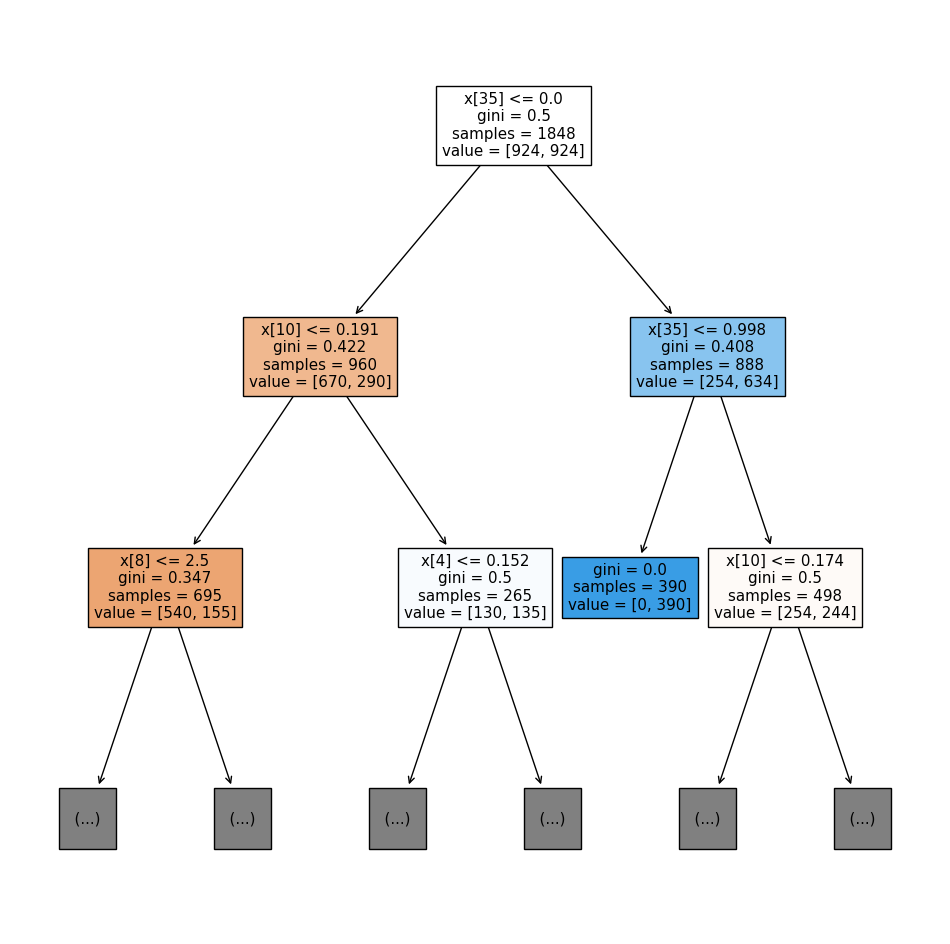

In [53]:
plt.figure(figsize=(12,12))
plot_tree(tree,max_depth=2,filled=True)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# Define a grid of hyperparameters to test
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Perform grid search with 10-fold CV
grid_search = GridSearchCV(tree, param_grid, cv=10, scoring='accuracy', return_train_score=True)

grid_search.fit(X_sm, y_sm)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 6}
Best Accuracy: 0.829039365452409


In [56]:
depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth = depth)

    cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    #print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.25862811647161 Validation: 75.09988249118685
***************
K-Fold for depth:4 Accuracy Mean: Train: 82.40742373606548 Validation: 75.42978848413632
***************
K-Fold for depth:5 Accuracy Mean: Train: 85.8646582577825 Validation: 82.09253819036428
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 83.28995299647474
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.01783587353718 Validation: 83.17978848413631
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.21836333202275 Validation: 82.85722679200941
***************
K-Fold for depth:13 Accuracy Mean: Train: 99.81360435265275 Validation: 82.8575205640423
***************
K-Fold for depth:15 Accuracy Mean: Train: 99.93385447985568 Validation: 83.12779083431258
***************


In [57]:
#Training with best parms

In [58]:
tree_dt=DecisionTreeClassifier(random_state=7,max_depth=4)

In [59]:
tree_dt.fit(X_sm,y_sm)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [60]:
y_pred=tree_dt.predict(X_test)

In [61]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, y_pred)

0.8097826086956522

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[285  24]
 [ 46  13]]


Text(0.5, 23.52222222222222, 'Predicted')

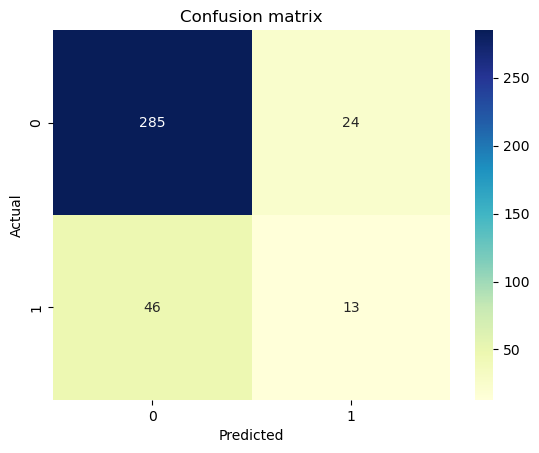

In [69]:
sns.heatmap(cm, annot=True, cmap= 'YlGnBu', fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [70]:
accuracy_score(y_test,y_pred)

0.8097826086956522

In [71]:
#Coefficients

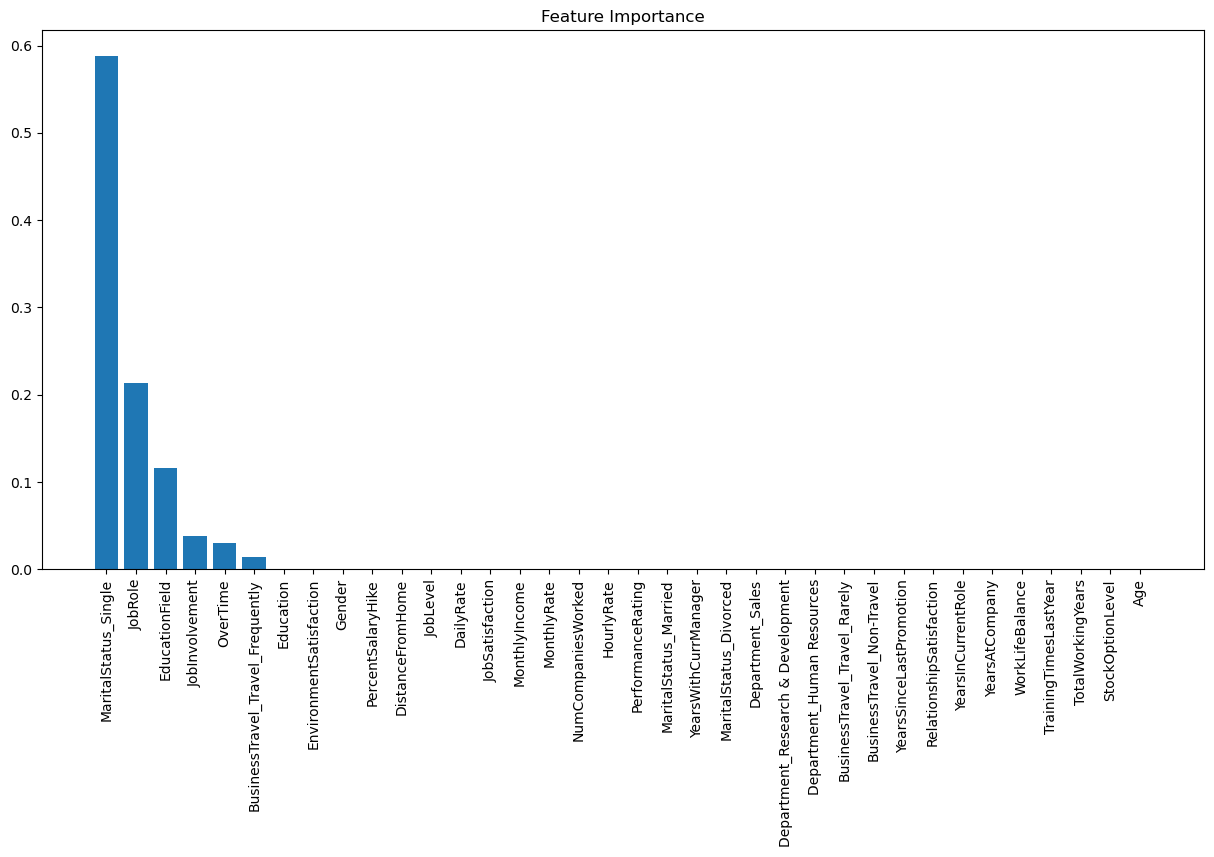

In [72]:
importances = tree_dt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [73]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_sm.columns))):
    feat = X_sm.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.588142
1,JobRole,0.213284
2,EducationField,0.116106
3,JobInvolvement,0.037671
4,OverTime,0.030477
5,BusinessTravel_Travel_Frequently,0.014321
6,BusinessTravel_Non-Travel,0.000000
7,WorkLifeBalance,0.000000
8,YearsAtCompany,0.000000
9,YearsInCurrentRole,0.000000


->StockOptionLevel affects attrition the most

->So the company can focus on providing more stocks to employees

->Then comes factors such as Job_satisfaction and JobRole